<a href="https://colab.research.google.com/github/Yongshilin/Forage-BCG-DA/blob/main/Task_3_feature_engineering(submitted).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Code by Yongshi Lin

# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [43]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from collections import Counter  #count frequency

---
## 2. Load data

In [3]:
df = pd.read_csv('clean_data_after_eda.csv')

# change date format
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [4]:
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,0.000908,2.086294,99.530517,44.235794,2.086425,9.953056e+01,44.236702,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000,0


In [5]:
df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'var_year_price_off_peak_var', 'var_year_price_peak_var',
       'var_year_price_mid_peak_var', 'var_year_price_off_peak_fix',
       'var_year_price_peak_fix', 'var_year_price_mid_peak_fix',
       'var_year_price_off_peak', 'var_year_price_peak',
       'var_year_price_mid_peak', 'var_6m_price_off_peak_var',
       'var_6m_price_peak_var', 'var_6m_price_mid_peak_var',
       'var_6m_price_off_peak_fix', 'var_6m_price_peak_fix',
       'var_6m_price_mid_peak_fix', 'var_6m_p

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [36]:
df.nunique()

,0
id,14606
channel_sales,8
cons_12m,11065
cons_gas_12m,2112
cons_last_month,4751
date_activ,1796
date_end,368
date_modif_prod,2129
date_renewal,386
forecast_cons_12m,13993


In [37]:
df.describe()

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606,14606,14606,14606,14606.000000,14606.000000,14606.000000,...,14606.000000,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,1.460600e+04,1.460600e+04,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,2011-01-28 07:54:18.879912448,2016-07-27 20:48:26.422018560,2013-01-02 12:29:10.951663872,2015-07-21 06:59:00.353279488,1868.614880,1399.762906,0.966726,...,0.000025,3.304264e-05,1.406015e-05,0.922810,1.460247,0.634413,0.922835,1.460280e+00,6.344275e-01,0.097152
min,0.000000e+00,0.000000e+00,0.000000,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,2010-01-15 00:00:00,2016-04-27 06:00:00,2010-08-12 00:00:00,2015-04-17 00:00:00,494.995000,0.000000,0.000000,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000004,0.000000e+00,0.000000e+00,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,2011-03-04 00:00:00,2016-08-01 00:00:00,2013-06-19 00:00:00,2015-07-27 00:00:00,1112.875000,314.000000,0.000000,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000011,9.450150e-08,0.000000e+00,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2012-04-19 00:00:00,2016-10-31 00:00:00,2015-06-16 00:00:00,2015-10-29 00:00:00,2401.790000,1745.750000,0.000000,...,0.000011,2.896760e-06,4.860000e-10,0.007962,0.000000,0.000000,0.007973,2.896760e-06,4.860000e-10,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00,82902.830000,175375.000000,30.000000,...,0.005543,4.791197e-03,2.415288e-03,525.988881,399.471115,80.876029,525.994268,3.994725e+02,8.087765e+01,1.000000
std,5.734653e+05,1.629731e+05,64364.196422,NaN,NaN,NaN,NaN,2387.571531,3247.786255,5.108289,...,0.000204,2.231791e-04,1.273170e-04,18.218286,13.760009,5.895346,18.218452,1.376010e+01,5.895470e+00,0.296175


---

## 3. Feature engineering

Our goal for the feature engineering is to predict churn.

Fearture engineering includes 5 processes:
1. Feature Creation
2. Feature Transformation
3. Feature Extraction
4. Feature Selection
5. Feature Scaling

Steps:
1. Data cleaning
2. Data Transformation
3. Feature Extration
4. Feature Selection
5. Feature Iteration

----
### 1. Feature Creation
#### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [38]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [39]:
# Group prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'date_end']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean',
                                                                  'price_peak_var':'mean', 'price_peak_fix': 'mean',
                                                                  'price_mid_peak_var': 'mean', 'price_mid_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2',
                                           'price_peak_var':'dec_3', 'price_peak_fix': 'dec_4',
                                           'price_mid_peak_var': 'dec_5', 'price_mid_peak_fix': 'dec_6'}), jan_prices.drop(columns='price_date'), on='id')

diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff['peak_diff_dec_january_energy'] = diff['dec_3'] - diff['price_peak_var']
diff['peak_diff_dec_january_power'] = diff['dec_4'] - diff['price_peak_fix']
diff['midpeak_diff_dec_january_energy'] = diff['dec_5'] - diff['price_mid_peak_var']
diff['midpeak_diff_dec_january_power'] = diff['dec_6'] - diff['price_mid_peak_fix']

diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power', 'peak_diff_dec_january_energy', 'peak_diff_dec_january_power', 'midpeak_diff_dec_january_energy', 'midpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,peak_diff_dec_january_energy,peak_diff_dec_january_power,midpeak_diff_dec_january_energy,midpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916,-0.002302,0.097749,0.003487,0.065166
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779,0.000000,0.000000,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000,0.000000,0.000000,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916,-0.005120,0.097749,0.000763,0.065166
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001,0.000000,0.000000,0.000000,0.000000


----
### 2. Feature Scaling & Transformation

#### Deal with categorical variables

In [58]:
print(df['has_gas'].unique())

[1 0]


In [60]:
# Convert 'region' to binary values using get_dummies
df['has_gas'] = df['has_gas'].str.strip().str.lower()
df['has_gas'] = df['has_gas'].map({'t': 1, 'f': 0}) #1 means has gas, 0 means not.
print(df['has_gas'].isna().sum())

0


#### Consumption

In [65]:
# remove outlier
def remove_outliers_iqr(data, *columns):
    """
    Remove outliers from specified columns using the IQR method.

    Parameters:
    - data (pd.DataFrame): The input DataFrame.
    - columns (list of str): Columns to remove outliers from.

    Returns:
    - pd.DataFrame: DataFrame with outliers removed.
    """
    data_cleaned = data.copy()

    for column in columns:
        Q1 = data_cleaned[column].quantile(0.25)
        Q3 = data_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        data_cleaned = data_cleaned[(data_cleaned[column] >= lower_bound) & (data_cleaned[column] <= upper_bound)]

    return data_cleaned

In [66]:
consumption = df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']].copy()

In [67]:
# apply remove outlier function
consumption_cleaned = remove_outliers_iqr(consumption, 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons')
consumption_cleaned.head()

,id,cons_12m,cons_gas_12m,cons_last_month,imp_cons,has_gas,churn
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,0.00,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,0.00,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,0.00,0,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,52.32,0,0
5,1aa498825382410b098937d65c4ec26d,8302,0,1998,181.21,0,1


In [68]:
# Feature Scaling - standardation
scaler = StandardScaler()
consumption_scaled = pd.DataFrame(scaler.fit_transform(consumption_cleaned[['cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons']]),
                                  columns=['cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons'])
consumption_scaled = pd.concat([consumption_scaled, consumption_cleaned[['id','has_gas','churn']].reset_index(drop=True)], axis=1)
consumption_scaled.head()

,cons_12m,cons_gas_12m,cons_last_month,imp_cons,id,has_gas,churn
0,-0.611968,0.0,-0.705677,-0.685670,d29c2c54acc38ff3c0614d0a653813dd,0,0
1,-0.895401,0.0,-0.705677,-0.685670,764c75f661154dac3a6c254cd082ea7d,0,0
2,-0.823785,0.0,-0.705677,-0.685670,bba03439a292a1e166f80264c16191cb,0,0
3,-0.628150,0.0,-0.151168,-0.030018,149d57cf92fc41cf94415803a877cb4b,0,0
4,-0.361175,0.0,1.400614,1.585177,1aa498825382410b098937d65c4ec26d,0,1


In [69]:
# identify gas consumption & electricity consumption
consumption_gas = consumption_scaled[consumption_scaled['has_gas'] == 1].copy()
consumption_e = consumption_scaled[consumption_scaled['has_gas'] == 0].copy()

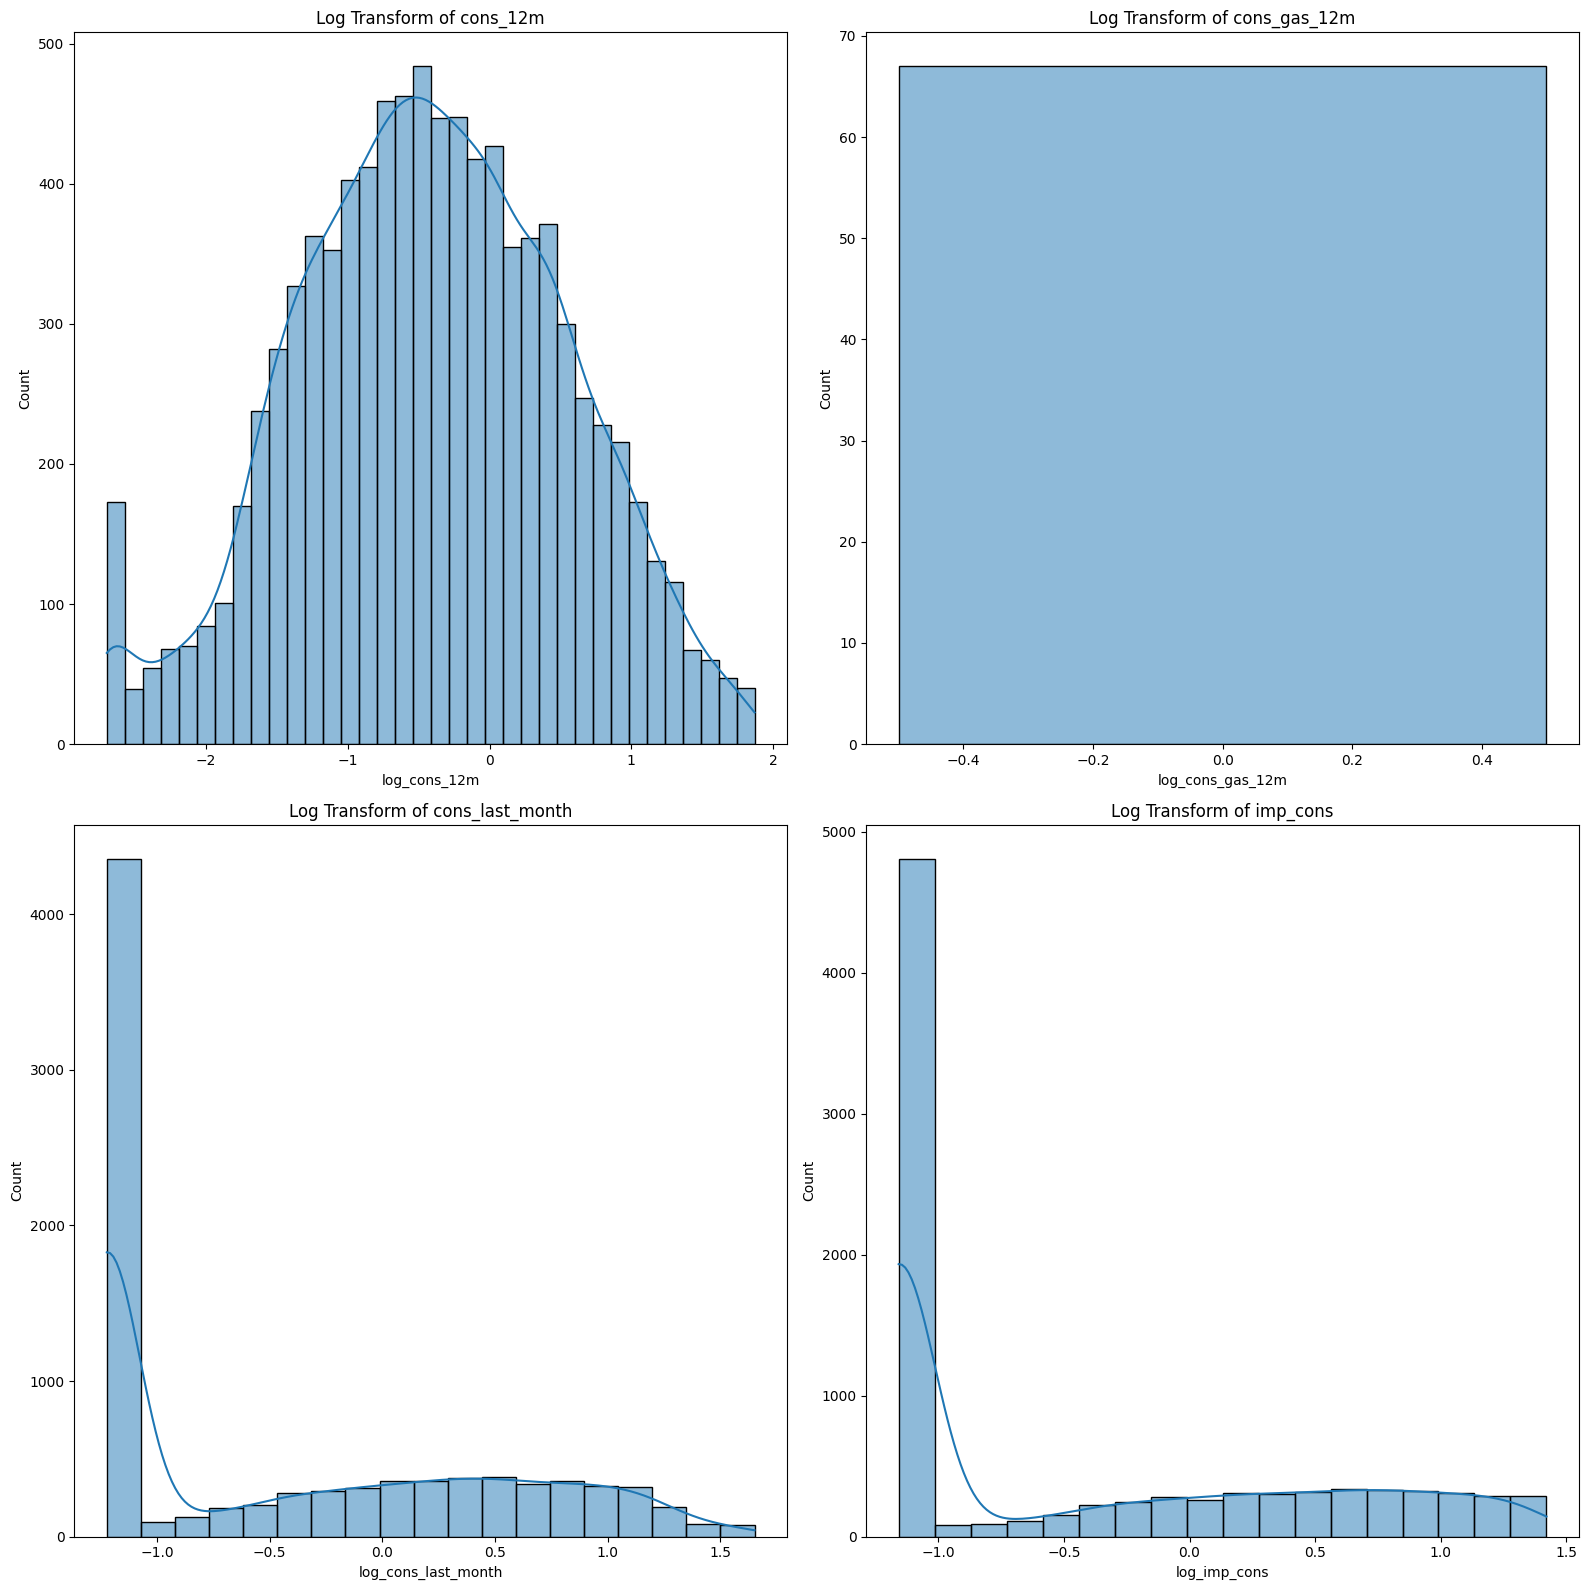

In [70]:
# Logarithmic Transformation
# too many 0 value, shift a constant value to all values before applying the log transformation ensures that zeros are handled properly
const = 1e-6
consumption_e.loc[:, 'log_cons_12m'] = np.log1p(consumption_e['cons_12m']+const)
consumption_gas.loc[:, 'log_cons_gas_12m'] = np.log1p(consumption_gas['cons_gas_12m']+const)
consumption_e.loc[:, 'log_cons_last_month'] = np.log1p(consumption_e['cons_last_month']+const)
consumption_scaled.loc[:, 'log_imp_cons'] = np.log1p(consumption_scaled['imp_cons']+const)

# Visualizing the transformations
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))

sns.histplot(consumption_e['log_cons_12m'], ax=axs[0,0], kde=True)
sns.histplot(consumption_gas['log_cons_gas_12m'], ax=axs[0,1], kde=True)
sns.histplot(consumption_e['log_cons_last_month'], ax=axs[1,0], kde=True)
sns.histplot(consumption_scaled['log_imp_cons'], ax=axs[1,1], kde=True)

axs[0, 0].set_title('Log Transform of cons_12m')
axs[0, 1].set_title('Log Transform of cons_gas_12m')
axs[1, 0].set_title('Log Transform of cons_last_month')
axs[1, 1].set_title('Log Transform of imp_cons')

plt.tight_layout()
plt.show()

##### Column 'cons_gas_12m' become all 0 values after removing outliers, we can look into if this column is important for the goal. If the column is not relevant or informative, it might be best to drop it from the analysis.

#### Forecast

In [16]:
forecast = df[
    ["id", "forecast_cons_12m", "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak", "forecast_price_pow_off_peak","churn"]
    ]

In [17]:
# apply remove outlier function
forecast_cleaned = remove_outliers_iqr(forecast, "forecast_cons_12m", "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak", "forecast_price_pow_off_peak")
forecast_cleaned.head()

,id,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1
1,d29c2c54acc38ff3c0614d0a653813dd,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0
2,764c75f661154dac3a6c254cd082ea7d,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0
3,bba03439a292a1e166f80264c16191cb,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0
4,149d57cf92fc41cf94415803a877cb4b,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0


In [18]:
# Feature Scaling - standardation
scaler = StandardScaler()
forecast_scaled = pd.DataFrame(scaler.fit_transform(forecast_cleaned[["forecast_cons_12m", "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak", "forecast_price_pow_off_peak"]]),
                                  columns=["forecast_cons_12m", "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak", "forecast_price_pow_off_peak"])
forecast_scaled = pd.concat([forecast_scaled, forecast_cleaned[['id', 'churn']].reset_index(drop=True)], axis=1)
forecast_scaled.head()

,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,id,churn
0,-1.164219,-0.709927,0.0,-0.952510,-1.375535,1.103058,-1.384835,24011ae4ebbe3035111d65fa7c15bc57,1
1,-0.985916,-0.709927,0.0,-0.692073,0.476849,-0.933178,0.527973,d29c2c54acc38ff3c0614d0a653813dd,0
2,-1.119200,-0.709927,0.0,-0.288566,1.668058,0.890538,0.527973,764c75f661154dac3a6c254cd082ea7d,0
3,-0.938898,-0.709927,0.0,-0.628087,0.535155,-0.933178,0.527973,bba03439a292a1e166f80264c16191cb,0
4,-0.745802,-0.130055,0.0,1.383157,-1.232054,1.141919,-1.384835,149d57cf92fc41cf94415803a877cb4b,0


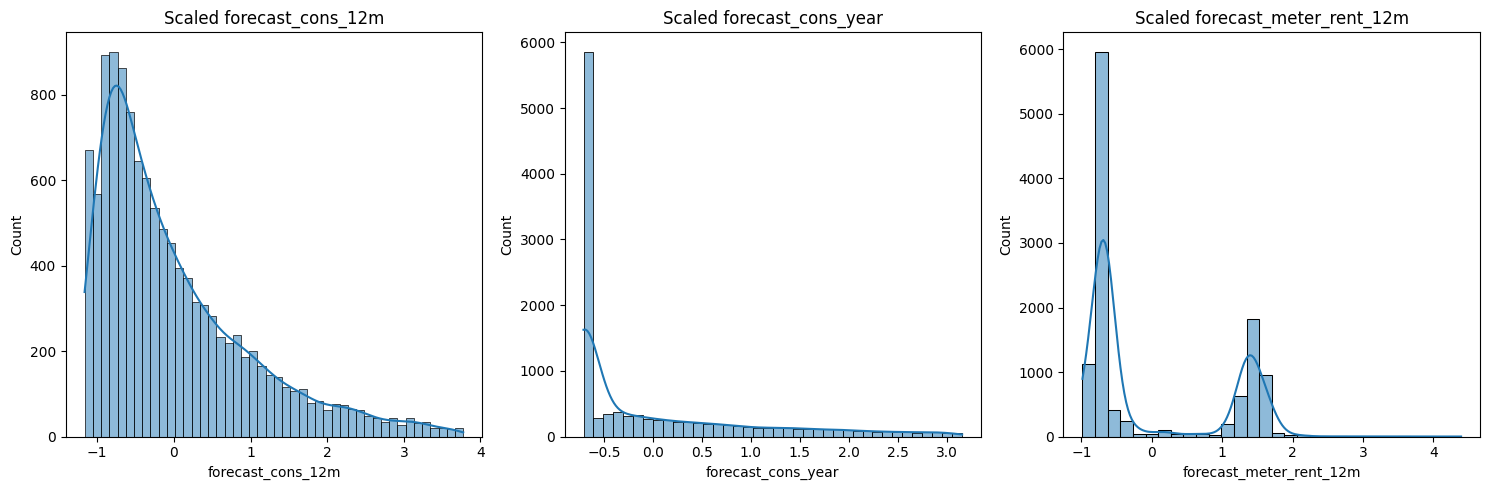

In [19]:
# visualizing scaled data
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

sns.histplot(forecast_scaled['forecast_cons_12m'], ax=axs[0], kde=True)
sns.histplot(forecast_scaled['forecast_cons_year'], ax=axs[1], kde=True)
sns.histplot(forecast_scaled['forecast_meter_rent_12m'], ax=axs[2], kde=True)

axs[0].set_title('Scaled forecast_cons_12m')
axs[1].set_title('Scaled forecast_cons_year')
axs[2].set_title('Scaled forecast_meter_rent_12m')

plt.tight_layout()
plt.show()

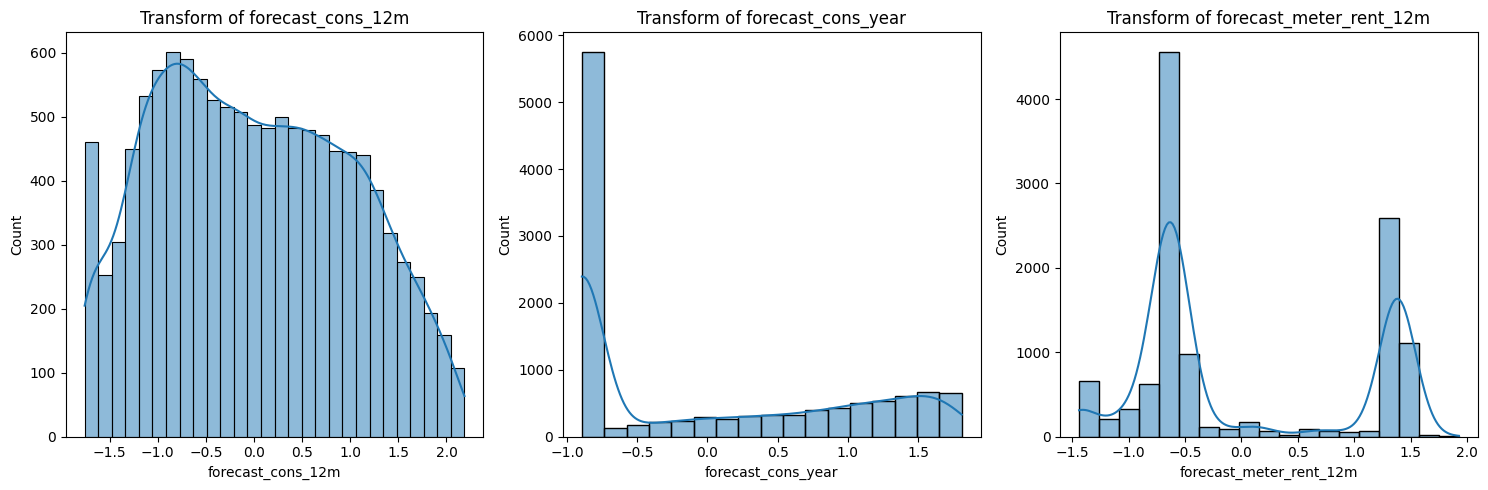

In [20]:
# Apply Power Transformer to handle negative values and improve distribution
pt = PowerTransformer(method='yeo-johnson')

# Drop non-numeric columns
forecast_scaled_numeric = forecast_scaled.drop(columns=['id', 'churn'])

data_transformed_array = pt.fit_transform(forecast_scaled_numeric)
# Create DataFrame with transformed data
data_transformed = pd.DataFrame(data_transformed_array, columns=forecast_scaled_numeric.columns)

# Visualizing the transformations
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

sns.histplot(data_transformed['forecast_cons_12m'], ax=axs[0], kde=True)
sns.histplot(data_transformed['forecast_cons_year'], ax=axs[1], kde=True)
sns.histplot(data_transformed['forecast_meter_rent_12m'], ax=axs[2], kde=True)

axs[0].set_title('Transform of forecast_cons_12m')
axs[1].set_title('Transform of forecast_cons_year')
axs[2].set_title('Transform of forecast_meter_rent_12m')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


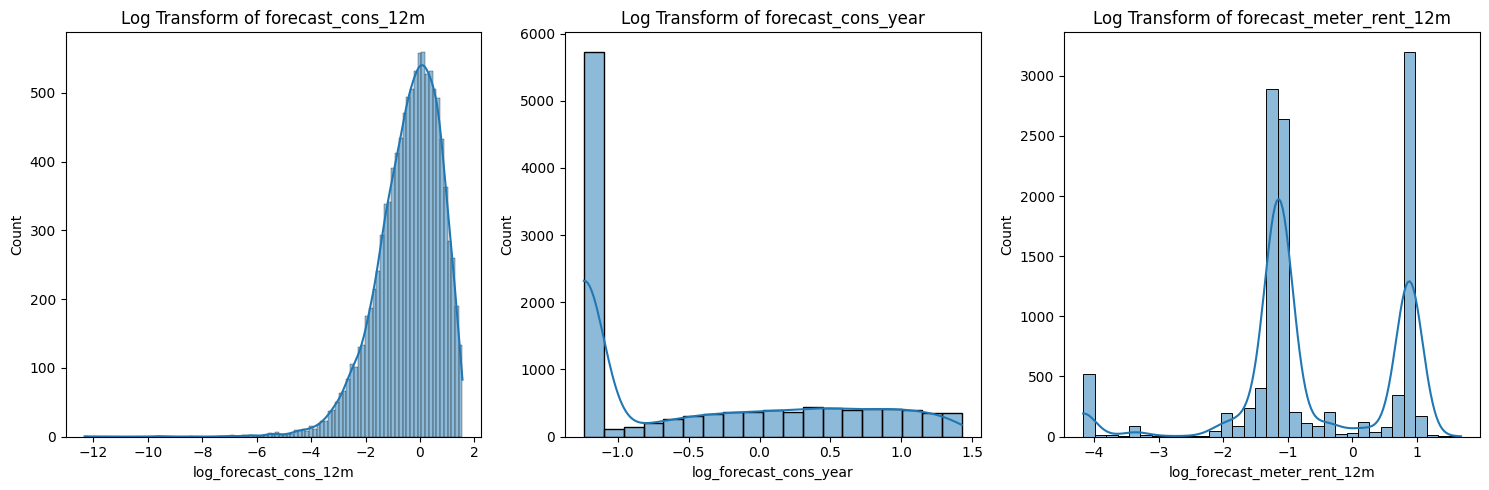

In [21]:
# log transform
# too many 0 value, shift a constant value to all values before applying the log transformation ensures that zeros are handled properly
const = 1e-6
forecast_scaled.loc[:, 'log_forecast_cons_12m'] = np.log1p(forecast_scaled['forecast_cons_12m']+const)
forecast_scaled.loc[:, 'log_forecast_cons_year'] = np.log1p(forecast_scaled['forecast_cons_year']+const)
forecast_scaled.loc[:, 'log_forecast_meter_rent_12m'] = np.log1p(forecast_scaled['forecast_meter_rent_12m']+const)

# Visualizing the transformations
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

sns.histplot(forecast_scaled['log_forecast_cons_12m'], ax=axs[0], kde=True)
sns.histplot(forecast_scaled['log_forecast_cons_year'], ax=axs[1], kde=True)
sns.histplot(forecast_scaled['log_forecast_meter_rent_12m'], ax=axs[2], kde=True)

axs[0].set_title('Log Transform of forecast_cons_12m')
axs[1].set_title('Log Transform of forecast_cons_year')
axs[2].set_title('Log Transform of forecast_meter_rent_12m')

plt.tight_layout()
plt.show()

#### Rescale forecast energy and power price for comparison

In [22]:
# Initialize Min-Max Scaler
scaler = MinMaxScaler()

forecast_price = forecast[['forecast_price_energy_off_peak','forecast_price_energy_peak', 'forecast_price_pow_off_peak']]

# Fit and transform the data
scaled_forecast_price = scaler.fit_transform(forecast_price)

# Convert back to DataFrame
scaled_fp_df = pd.DataFrame(scaled_forecast_price, columns=forecast_price.columns)
scaled_fp_df.head()

,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
0,0.417870,0.500788,0.685156
1,0.531864,0.000000,0.747665
2,0.605169,0.448521,0.747665
3,0.535452,0.000000,0.747665
4,0.426700,0.510346,0.685156


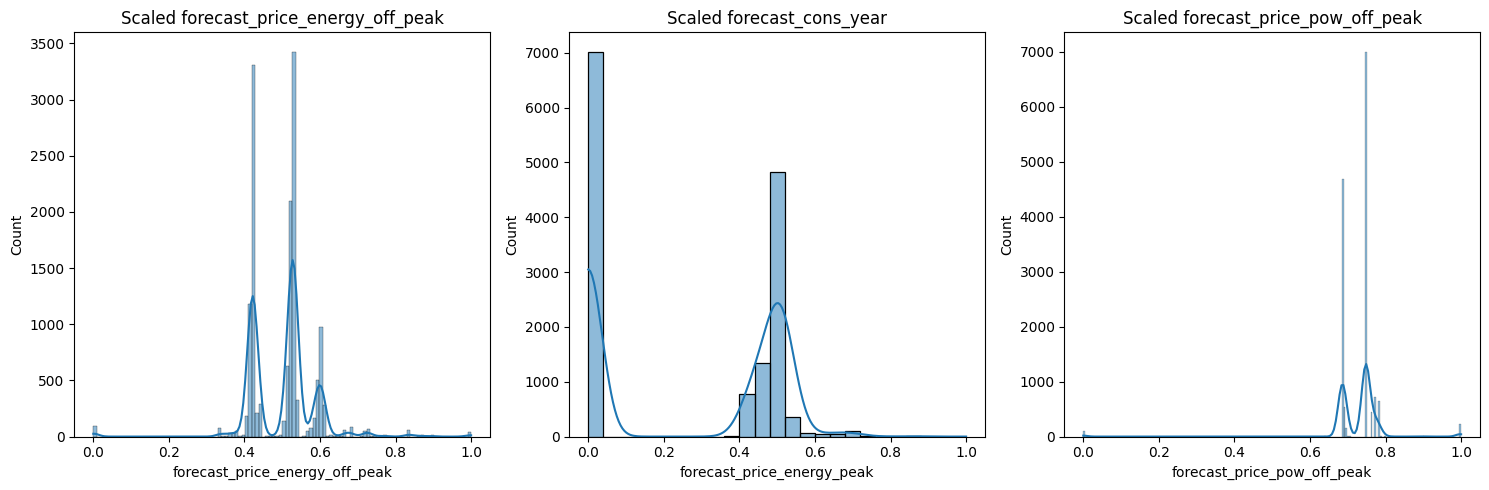

In [23]:
# visualizing scaled data
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

sns.histplot(scaled_fp_df['forecast_price_energy_off_peak'], ax=axs[0], kde=True)
sns.histplot(scaled_fp_df['forecast_price_energy_peak'], ax=axs[1], kde=True)
sns.histplot(scaled_fp_df['forecast_price_pow_off_peak'], ax=axs[2], kde=True)

axs[0].set_title('Scaled forecast_price_energy_off_peak')
axs[1].set_title('Scaled forecast_cons_year')
axs[2].set_title('Scaled forecast_price_pow_off_peak')

plt.tight_layout()
plt.show()

#### Subscribed Power & Power Suscription

In [24]:
power = df[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'pow_max', 'churn']]

In [25]:
# apply remove outlier function
power_cleaned = remove_outliers_iqr(power, 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'pow_max')
power_cleaned.head()

,id,margin_gross_pow_ele,margin_net_pow_ele,net_margin,pow_max,churn
1,d29c2c54acc38ff3c0614d0a653813dd,16.38,16.38,18.89,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,28.60,28.60,6.60,13.856,0
3,bba03439a292a1e166f80264c16191cb,30.22,30.22,25.46,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,44.91,44.91,47.98,19.800,0
5,1aa498825382410b098937d65c4ec26d,33.12,33.12,118.89,13.200,1


In [26]:
# Feature Scaling - standardation
scaler = StandardScaler()
power_scaled = pd.DataFrame(scaler.fit_transform(power_cleaned[['margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'pow_max']]),
                                  columns=['margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'pow_max'])
power_scaled = pd.concat([power_scaled, power_cleaned[['id','churn']].reset_index(drop=True)], axis=1)
power_scaled.head()

,margin_gross_pow_ele,margin_net_pow_ele,net_margin,pow_max,id,churn
0,-0.472877,-0.472660,-0.961556,-0.036081,d29c2c54acc38ff3c0614d0a653813dd,0
1,0.763618,0.763976,-1.068977,-0.018169,764c75f661154dac3a6c254cd082ea7d,0
2,0.927540,0.927916,-0.904131,-0.227999,bba03439a292a1e166f80264c16191cb,0
3,2.413965,2.414510,-0.707294,1.883099,149d57cf92fc41cf94415803a877cb4b,0
4,1.220980,1.221390,-0.087505,-0.227999,1aa498825382410b098937d65c4ec26d,1


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


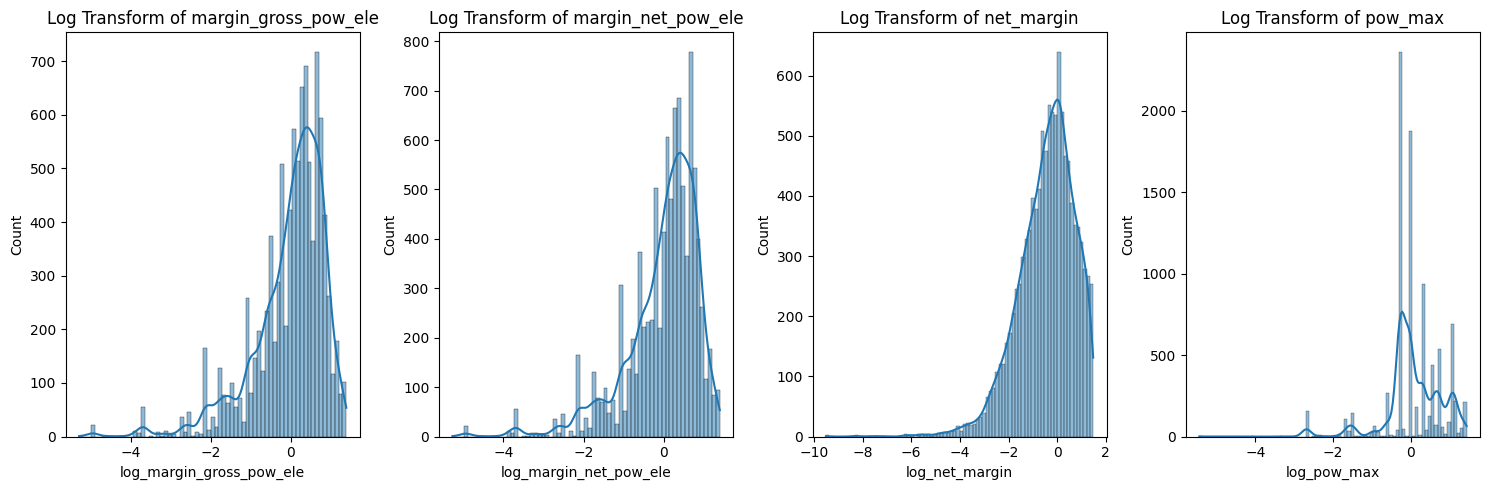

In [144]:
# log transform
# too many 0 value, shift a constant value to all values before applying the log transformation ensures that zeros are handled properly
const = 1e-6
power_scaled.loc[:, 'log_margin_gross_pow_ele'] = np.log1p(power_scaled['margin_gross_pow_ele']+const)
power_scaled.loc[:, 'log_margin_net_pow_ele'] = np.log1p(power_scaled['margin_net_pow_ele']+const)
power_scaled.loc[:, 'log_net_margin'] = np.log1p(power_scaled['net_margin']+const)
power_scaled.loc[:, 'log_pow_max'] = np.log1p(power_scaled['pow_max']+const)

# Visualizing the transformations
fig, axs = plt.subplots(ncols=4, figsize=(15, 5))

sns.histplot(power_scaled['log_margin_gross_pow_ele'], ax=axs[0], kde=True)
sns.histplot(power_scaled['log_margin_net_pow_ele'], ax=axs[1], kde=True)
sns.histplot(power_scaled['log_net_margin'], ax=axs[2], kde=True)
sns.histplot(power_scaled['log_pow_max'], ax=axs[3], kde=True)

axs[0].set_title('Log Transform of margin_gross_pow_ele')
axs[1].set_title('Log Transform of margin_net_pow_ele')
axs[2].set_title('Log Transform of net_margin')
axs[3].set_title('Log Transform of pow_max')

plt.tight_layout()
plt.show()

#### Var Year Energy Price

In [99]:
var_year_price = df[['id', 'var_year_price_off_peak_var', 'var_year_price_peak_var', 'var_year_price_mid_peak_var',
                     'var_year_price_off_peak_fix', 'var_year_price_peak_fix', 'var_year_price_mid_peak_fix',
                     'var_year_price_off_peak', 'var_year_price_peak', 'var_year_price_mid_peak', 'churn']]

In [91]:
# the third function plot_distribution helps you to plot the distribution of a numeric column
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

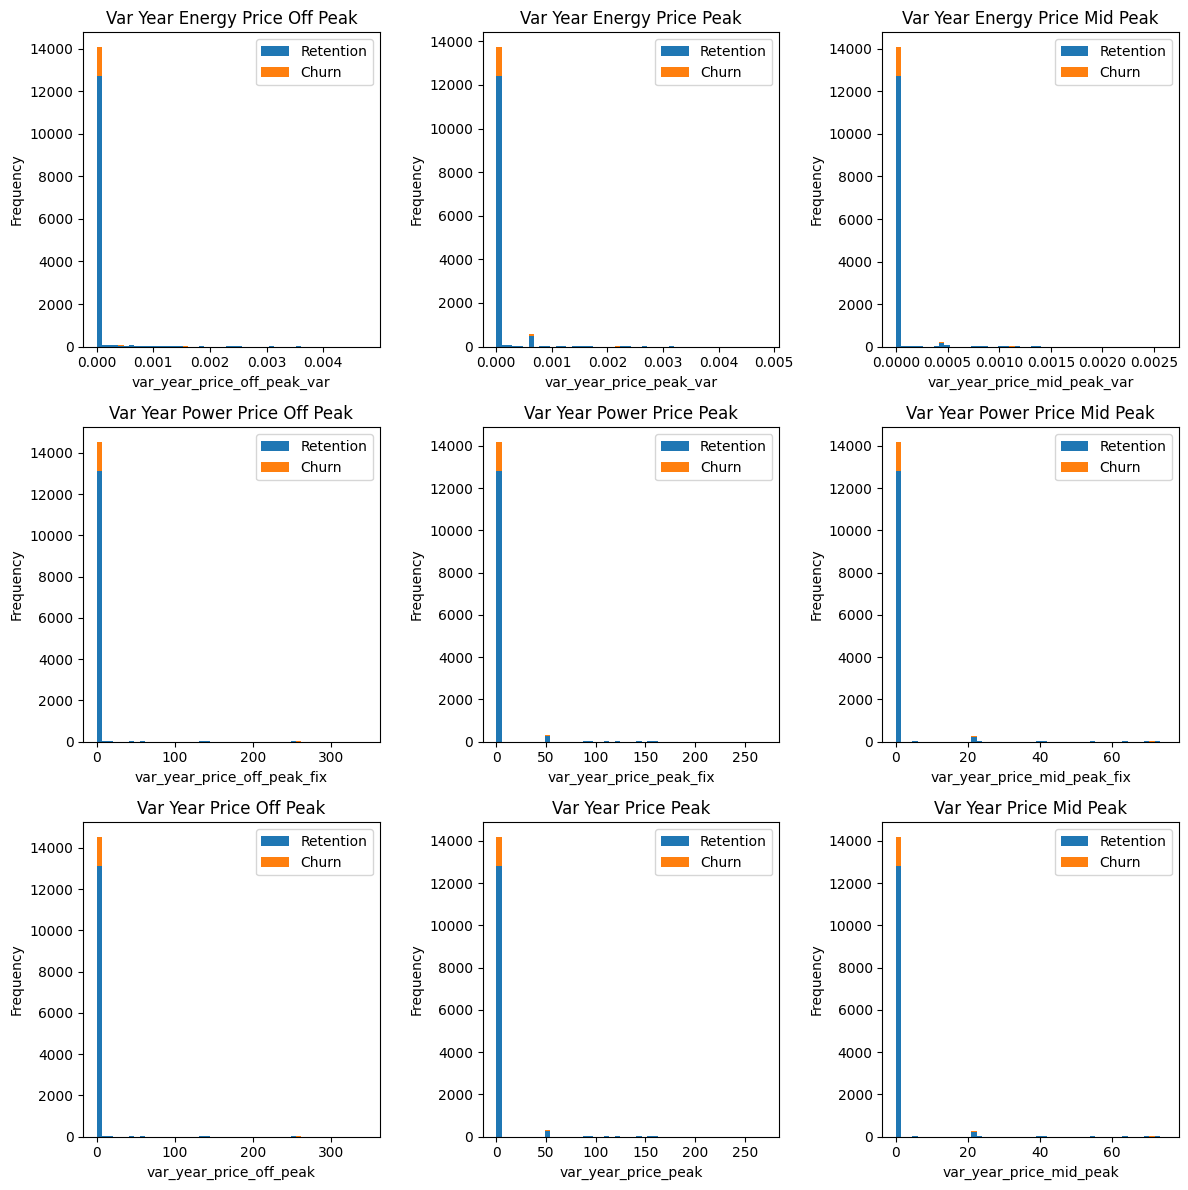

In [106]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

plot_distribution(var_year_price, 'var_year_price_off_peak_var', axs[0,0])
plot_distribution(var_year_price, 'var_year_price_peak_var', axs[0,1])
plot_distribution(var_year_price, 'var_year_price_mid_peak_var', axs[0,2])

plot_distribution(var_year_price, 'var_year_price_off_peak_fix', axs[1,0])
plot_distribution(var_year_price, 'var_year_price_peak_fix', axs[1,1])
plot_distribution(var_year_price, 'var_year_price_mid_peak_fix', axs[1,2])

plot_distribution(var_year_price, 'var_year_price_off_peak', axs[2,0])
plot_distribution(var_year_price, 'var_year_price_peak', axs[2,1])
plot_distribution(var_year_price, 'var_year_price_mid_peak', axs[2,2])

axs[0,0].set_title('Var Year Energy Price Off Peak')
axs[0,1].set_title('Var Year Energy Price Peak')
axs[0,2].set_title('Var Year Energy Price Mid Peak')

axs[1,0].set_title('Var Year Power Price Off Peak')
axs[1,1].set_title('Var Year Power Price Peak')
axs[1,2].set_title('Var Year Power Price Mid Peak')

axs[2,0].set_title('Var Year Price Off Peak')
axs[2,1].set_title('Var Year Price Peak')
axs[2,2].set_title('Var Year Price Mid Peak')

plt.tight_layout()
plt.show()

#### Var 6-Months Price

In [103]:
var_6m_price = df[['id', 'var_6m_price_off_peak_var', 'var_6m_price_peak_var', 'var_6m_price_mid_peak_var',
                    'var_6m_price_off_peak_fix', 'var_6m_price_peak_fix', 'var_6m_price_mid_peak_fix',
                    'var_6m_price_off_peak', 'var_6m_price_peak', 'var_6m_price_mid_peak','churn']]

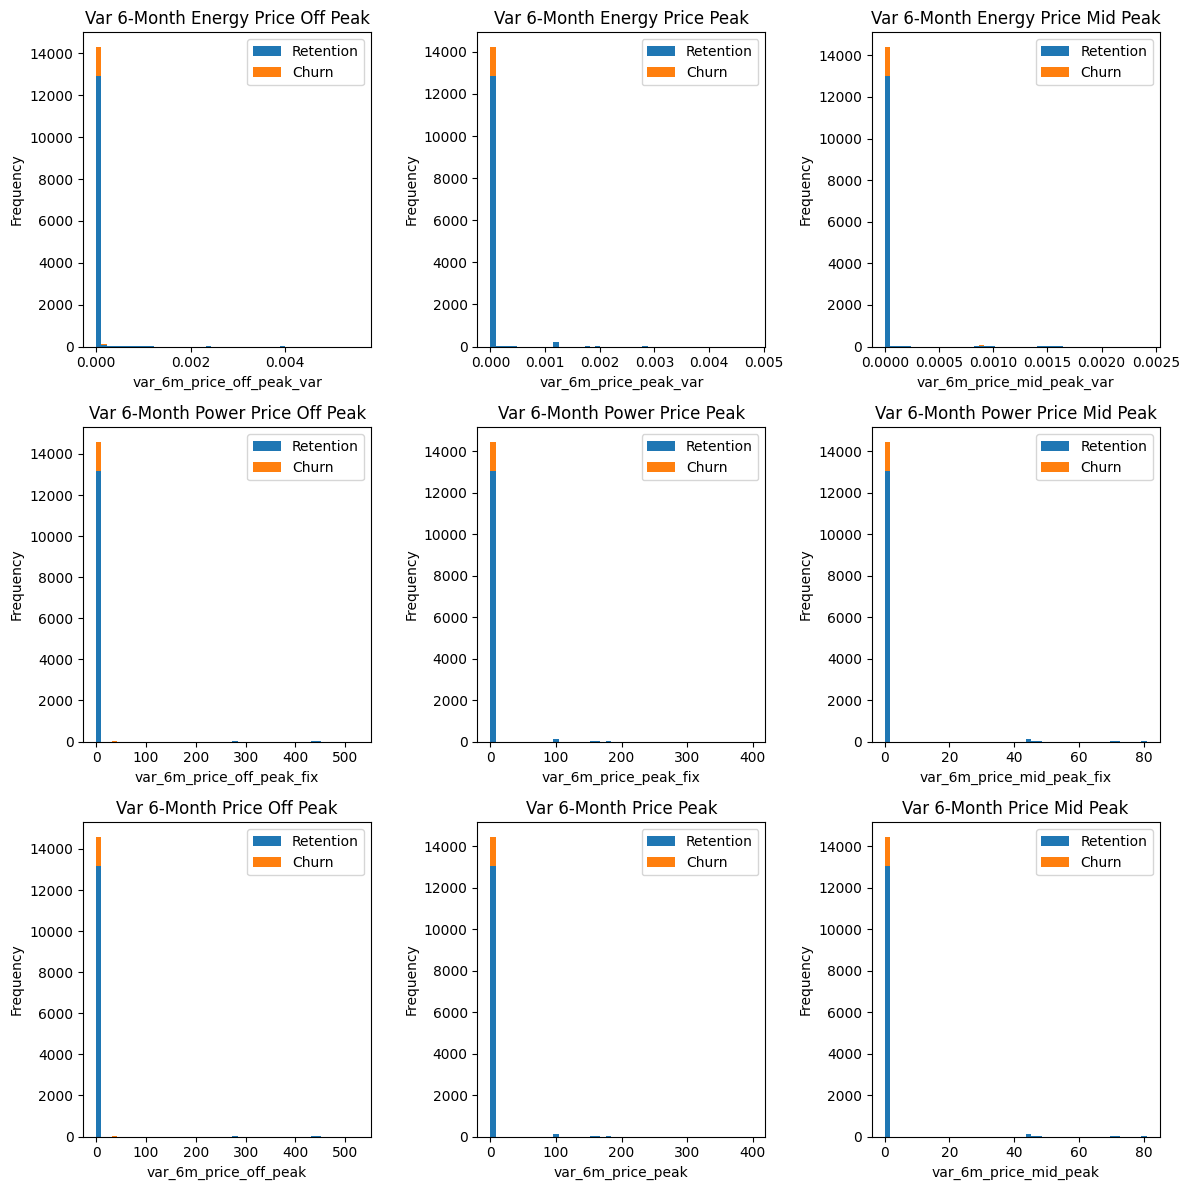

In [107]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

plot_distribution(var_6m_price, 'var_6m_price_off_peak_var', axs[0,0])
plot_distribution(var_6m_price, 'var_6m_price_peak_var', axs[0,1])
plot_distribution(var_6m_price, 'var_6m_price_mid_peak_var', axs[0,2])

plot_distribution(var_6m_price, 'var_6m_price_off_peak_fix', axs[1,0])
plot_distribution(var_6m_price, 'var_6m_price_peak_fix', axs[1,1])
plot_distribution(var_6m_price, 'var_6m_price_mid_peak_fix', axs[1,2])

plot_distribution(var_6m_price, 'var_6m_price_off_peak', axs[2,0])
plot_distribution(var_6m_price, 'var_6m_price_peak', axs[2,1])
plot_distribution(var_6m_price, 'var_6m_price_mid_peak', axs[2,2])

axs[0,0].set_title('Var 6-Month Energy Price Off Peak')
axs[0,1].set_title('Var 6-Month Energy Price Peak')
axs[0,2].set_title('Var 6-Month Energy Price Mid Peak')

axs[1,0].set_title('Var 6-Month Power Price Off Peak')
axs[1,1].set_title('Var 6-Month Power Price Peak')
axs[1,2].set_title('Var 6-Month Power Price Mid Peak')

axs[2,0].set_title('Var 6-Month Price Off Peak')
axs[2,1].set_title('Var 6-Month Price Peak')
axs[2,2].set_title('Var 6-Month Price Mid Peak')

plt.tight_layout()
plt.show()

### Feature Extraction - Dimensionality Reduction

PCA Analysis for Cleaned dataset

In [7]:
# Select only the numerical columns and drop any categorical column
df1_dropped = df.drop(columns=['churn', 'has_gas'])
num_df1 = df1_dropped.select_dtypes(include=['number'])

In [8]:
num_pcs = PCA()
num_pcs.fit(num_df1.dropna(axis=0))
num_pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(num_pcs.explained_variance_),
                           'Proportion of variance': num_pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(num_pcs.explained_variance_ratio_)})
num_pcsSummary_df = num_pcsSummary_df.transpose()
num_pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(num_pcsSummary_df.columns) + 1)]
num_pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35
Standard deviation,582665.8053,140770.9853,15816.8343,3638.3869,1572.4942,197.9022,85.1665,60.6585,34.0936,27.857,...,0.0001,0.0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Proportion of variance,0.9442,0.0551,0.0007,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,...,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cumulative proportion,0.9442,0.9993,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.000,...,1.0000,1.0000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [9]:
#PCA score
num_pcsComponents_df = pd.DataFrame(num_pcs.components_.transpose(), columns=num_pcsSummary_df.columns,
                                index=num_df1.columns)
num_pcsComponents_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35
cons_12m,0.9836,-0.1464,-0.1057,0.0009,0.0022,0.0000,0.0000,0.0000,-0.0000,0.0000,...,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000
cons_gas_12m,0.1453,0.9892,-0.0176,0.0005,0.0002,-0.0000,0.0000,0.0000,-0.0000,-0.0000,...,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000
cons_last_month,0.1071,0.0020,0.9939,-0.0203,-0.0192,-0.0002,-0.0002,-0.0001,0.0000,-0.0000,...,0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000
forecast_cons_12m,0.0008,-0.0003,-0.0055,0.5308,-0.8408,-0.1065,-0.0001,0.0032,0.0011,0.0016,...,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000
forecast_cons_year,0.0009,-0.0002,0.0274,0.8413,0.5304,0.0054,-0.0951,0.0325,0.0016,0.0032,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000
forecast_discount_energy,-0.0000,0.0000,0.0000,0.0001,-0.0002,0.0013,0.0069,-0.0029,0.0036,0.0441,...,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000
forecast_meter_rent_12m,0.0000,0.0000,-0.0001,0.0056,-0.0034,0.0257,-0.2934,-0.9395,-0.0574,-0.1319,...,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000
forecast_price_energy_off_peak,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0001,0.0002,0.0000,0.0002,...,-0.0003,0.0001,0.0002,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000
forecast_price_energy_peak,0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0002,-0.0005,0.0000,-0.0000,...,0.0002,-0.0000,-0.0001,-0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000
forecast_price_pow_off_peak,-0.0000,-0.0000,0.0000,-0.0000,-0.0001,-0.0022,0.0086,0.0106,0.0003,-0.0017,...,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000


##### The first component PC1 account for more than 98% of the total variation associated with all 35 of the original numerical variables. This suggests that we can capture most of the variability in the data with just the first principal component. So 'cons_12m' is the most important variable in the Cleaned dataset.
As the first 3 PCs Cumulative proportion added to 1, here we will analyze 'cons_12m', 'cons_gas_12m' and 'cons_last_month'.

### Correlation to reduce columns

In [42]:
# Compute the correlation matrix
corr_matrix = num_df1.corr()
corr_matrix.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,var_year_price_mid_peak,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak
cons_12m,1.000000,0.488474,0.968212,0.193947,0.167093,-0.043282,0.065268,-0.007748,0.145908,-0.026566,...,0.064262,0.019428,-0.001380,0.068189,0.030496,0.067322,0.069571,0.030496,0.067322,0.069571
cons_gas_12m,0.488474,1.000000,0.507007,0.084359,0.080934,-0.012595,0.041393,-0.017684,0.074002,-0.020558,...,0.047781,0.018825,0.003117,0.039957,0.028802,0.040323,0.040105,0.028802,0.040323,0.040105
cons_last_month,0.968212,0.507007,1.000000,0.177773,0.193574,-0.040874,0.057476,-0.005187,0.136802,-0.023017,...,0.056279,0.018144,-0.002579,0.054798,0.028751,0.054060,0.056065,0.028751,0.054060,0.056065
forecast_cons_12m,0.193947,0.084359,0.177773,1.000000,0.647727,0.058435,0.305627,-0.135646,0.254056,-0.018477,...,0.044353,0.008810,-0.006810,0.052512,0.005566,0.057503,0.035225,0.005566,0.057502,0.035225
forecast_cons_year,0.167093,0.080934,0.193574,0.647727,1.000000,0.008518,0.276009,-0.158012,0.251005,-0.044190,...,0.037002,-0.008259,-0.025097,0.015020,-0.017138,0.016133,0.006168,-0.017138,0.016133,0.006168


In [21]:
# set correlation threshold
threshold = 0.9

In [22]:
# create a set to drop highly correlated columns
columns_to_drop = set()

In [37]:
# Find pairs of highly correlated variables
corr_matrix = corr_matrix.abs()

high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > threshold:
            colname_i = corr_matrix.columns[i]
            colname_j = corr_matrix.columns[j]
            # Add the column with higher correlation to the set
            if corr_matrix[colname_i].mean() > corr_matrix[colname_j].mean():
                columns_to_drop.add(colname_i)
            else:
                columns_to_drop.add(colname_j)
            high_corr_pairs.append((colname_i, colname_j))

# Display highly correlated pairs
print("Highly Correlated Pairs:")
for pair in high_corr_pairs:
    print(pair)

Highly Correlated Pairs:
('cons_12m', 'cons_last_month')
('forecast_cons_year', 'imp_cons')
('margin_gross_pow_ele', 'margin_net_pow_ele')
('var_year_price_mid_peak_var', 'var_year_price_peak_fix')
('var_year_price_mid_peak_var', 'var_year_price_mid_peak_fix')
('var_year_price_mid_peak_var', 'var_year_price_peak')
('var_year_price_mid_peak_var', 'var_year_price_mid_peak')
('var_year_price_off_peak_fix', 'var_year_price_off_peak')
('var_year_price_off_peak_fix', 'var_6m_price_off_peak_fix')
('var_year_price_off_peak_fix', 'var_6m_price_off_peak')
('var_year_price_peak_fix', 'var_year_price_mid_peak_fix')
('var_year_price_peak_fix', 'var_year_price_peak')
('var_year_price_peak_fix', 'var_year_price_mid_peak')
('var_year_price_mid_peak_fix', 'var_year_price_peak')
('var_year_price_mid_peak_fix', 'var_year_price_mid_peak')
('var_year_price_off_peak', 'var_6m_price_off_peak_fix')
('var_year_price_off_peak', 'var_6m_price_off_peak')
('var_year_price_peak', 'var_year_price_mid_peak')
('var_6m

In [34]:
# Count the occurrences of each column in the pairs
columns_count = Counter([col for pair in high_corr_pairs for col in pair])

# Sort columns by frequency in descending order
sorted_columns = sorted(columns_count, key=columns_count.get, reverse=True)

In [38]:
# Iterate over the sorted columns and drop them if they are part of a high correlation pair
for col in sorted_columns:
    if any(col in pair for pair in high_corr_pairs):
        columns_to_drop.add(col)
        # Remove pairs that contain the dropped column
        high_corr_pairs = [pair for pair in high_corr_pairs if col not in pair]

print("Columns to drop:")
print(columns_to_drop)

Columns to drop:
{'var_6m_price_mid_peak_fix', 'var_year_price_mid_peak', 'var_year_price_peak', 'var_year_price_off_peak_fix', 'var_6m_price_mid_peak', 'forecast_cons_year', 'imp_cons', 'var_year_price_off_peak', 'var_6m_price_off_peak_fix', 'var_year_price_peak_fix', 'var_6m_price_mid_peak_var', 'var_6m_price_peak', 'margin_gross_pow_ele', 'var_year_price_mid_peak_fix', 'var_year_price_mid_peak_var', 'var_6m_price_peak_fix', 'cons_12m', 'var_6m_price_off_peak'}


In [41]:
# Drop the columns from the dataframe
df_reduced = df.drop(columns=columns_to_drop)

print("Reduced DataFrame:")
df_reduced.head(3)

Reduced DataFrame:


,id,channel_sales,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_discount_energy,...,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,var_year_price_off_peak_var,var_year_price_peak_var,var_6m_price_off_peak_var,var_6m_price_peak_var,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0.0,...,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,0.000061,2.627605e-05,0.000131,4.100838e-05,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0.0,...,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.000005,6.089453e-04,0.000003,1.217891e-03,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0.0,...,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.000006,2.558511e-07,0.000004,9.450150e-08,0


##### According to correlation matrix, we drop columns that has over 0.9 correlation threshold:
{'var_6m_price_mid_peak_fix', 'var_year_price_mid_peak', 'var_year_price_peak', 'var_year_price_off_peak_fix', 'var_6m_price_mid_peak', 'forecast_cons_year', 'imp_cons', 'var_year_price_off_peak', 'var_6m_price_off_peak_fix', 'var_year_price_peak_fix', 'var_6m_price_mid_peak_var', 'var_6m_price_peak', 'margin_gross_pow_ele', 'var_year_price_mid_peak_fix', 'var_year_price_mid_peak_var', 'var_6m_price_peak_fix', 'cons_12m', 'var_6m_price_off_peak'}